In [1]:
%reset -f
%matplotlib inline

In [2]:
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [3]:
pd.options.display.float_format = "{:.4f}".format

In [4]:
data = pd.read_csv("data/ex3data.tsv", sep = "\t"); data.head()

,exam_1_score,exam_2_score,pass
0,34.6237,78.0247,0
1,30.2867,43.8950,0
2,35.8474,72.9022,0
3,60.1826,86.3086,1
4,79.0327,75.3444,1


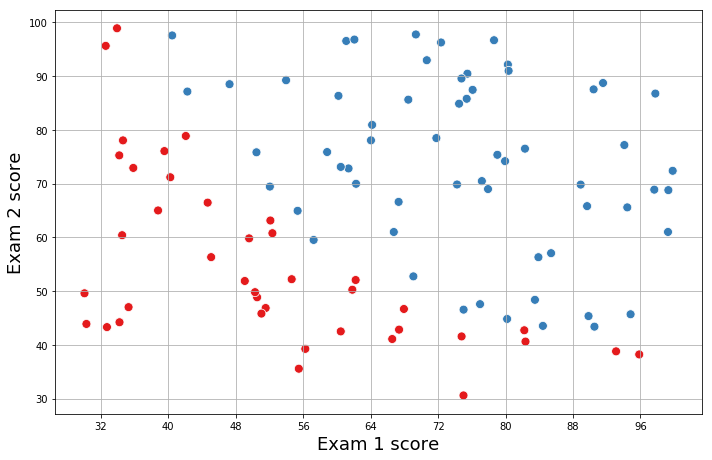

In [5]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax = sns.scatterplot(data = data, x = "exam_1_score", y = "exam_2_score", hue = "pass", palette = "Set1", s = 80, legend = False)
ax.set_xlabel("Exam 1 score", fontsize = 18)
ax.set_ylabel("Exam 2 score", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [6]:
x = data[["exam_1_score", "exam_2_score"]].values
y = data[["pass"]].values

In [7]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80)

In [8]:
model = sbbml.LogisticClassifier(alpha = 0.01, normalize = True)
model.fit(x_train, y_train)
pprint.pprint(model.theta)

{0: array([[-2.48264382],
       [-3.85037378],
       [-3.93905586]]),
 1: array([[2.48264382],
       [3.85037378],
       [3.93905586]])}


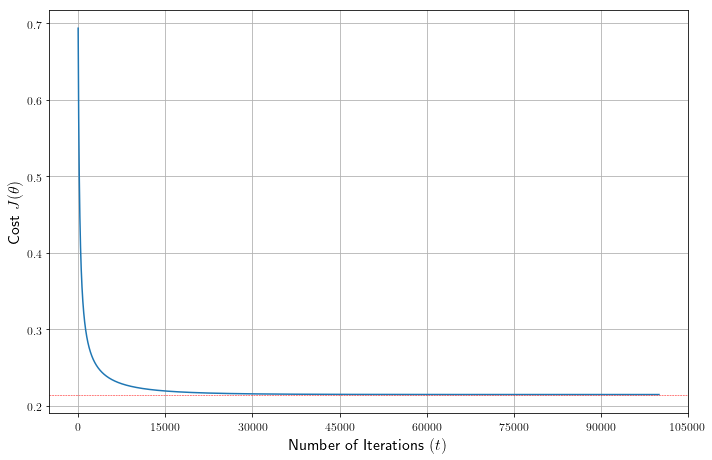

In [9]:
utils.plot_cost_function(cost = model.cost[0], width = 10.0, height = 6.5)

In [10]:
y_prime = model.predict(x_test)
np.mean(y_test.flatten() == y_prime.flatten())

0.95

In [11]:
model = sbbml.LogisticClassifier(alpha = 0.01, normalize = True)
x_train_poly = utils.map_polynomial_features(x = x_train, degree = 3)
model.fit(x_train_poly, y_train)

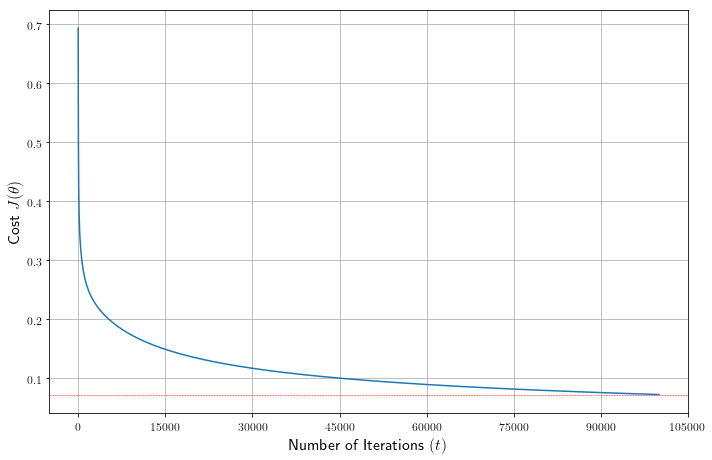

In [12]:
utils.plot_cost_function(cost = model.cost[0], width = 10.0, height = 6.5)

In [13]:
x_test_poly = utils.map_polynomial_features(x = x_test, degree = 3)
y_prime = model.predict(x_test_poly)
np.mean(y_test.flatten() == y_prime.flatten())

1.0

In [14]:
data = pd.read_csv("data/ex4data.tsv", sep = "\t"); data.head()

,microchip_test_1,microchip_test_2,pass
0,0.0513,0.6996,1
1,-0.0927,0.6849,1
2,-0.2137,0.6923,1
3,-0.3750,0.5022,1
4,-0.5132,0.4656,1


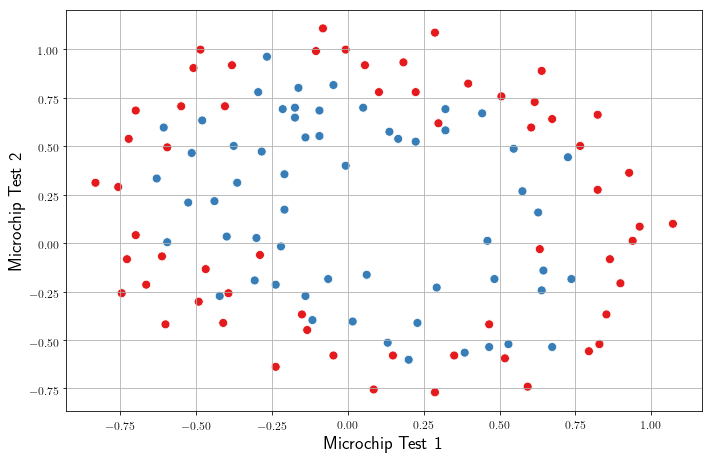

In [15]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax = sns.scatterplot(data = data, x = "microchip_test_1", y = "microchip_test_2", hue = "pass", palette = "Set1", s = 80, legend = False)
ax.set_xlabel("Microchip Test 1", fontsize = 18)
ax.set_ylabel("Microchip Test 2", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = False))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [16]:
x = data[["microchip_test_1", "microchip_test_2"]].values
y = data[["pass"]].values

In [17]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80)

In [18]:
model = sbbml.LogisticClassifier(alpha = 0.01, normalize = True)
model.fit(x_train, y_train)
pprint.pprint(model.theta)

{0: array([[ 0.1292975 ],
       [ 0.20127674],
       [-0.02694219]]),
 1: array([[-0.12929748],
       [-0.20127668],
       [ 0.02694224]])}


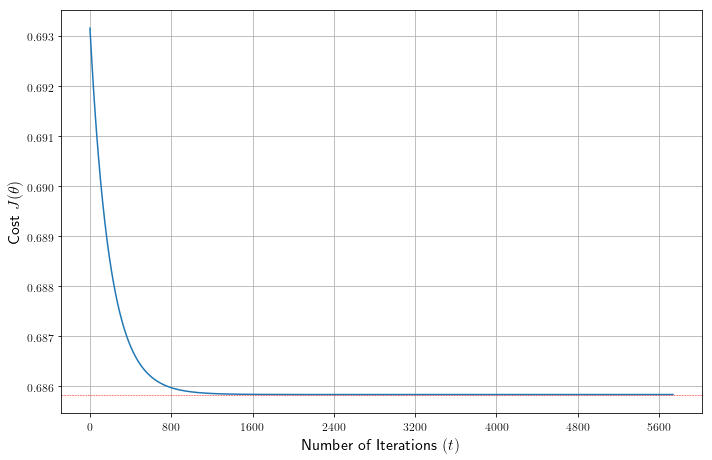

In [19]:
utils.plot_cost_function(cost = model.cost[0], width = 10.0, height = 6.5)

In [20]:
y_prime = model.predict(x_test)
np.mean(y_test.flatten() == y_prime.flatten())

0.375

In [21]:
model = sbbml.LogisticClassifier(alpha = 0.01, normalize = True)
x_train_poly = utils.map_polynomial_features(x = x_train, degree = 3)
model.fit(x_train_poly, y_train)

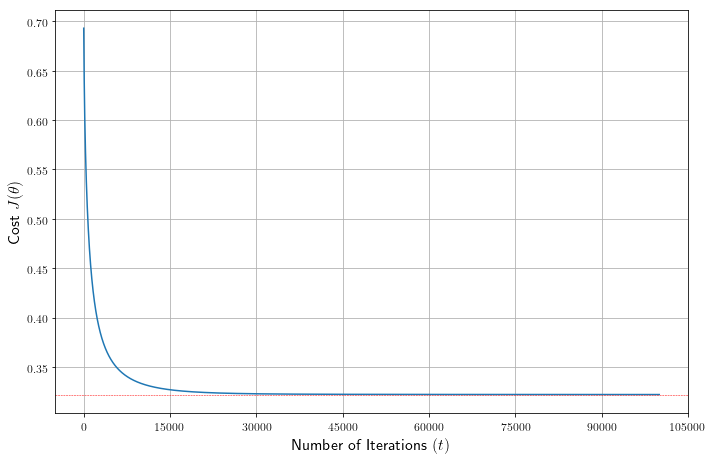

In [22]:
utils.plot_cost_function(cost = model.cost[0], width = 10.0, height = 6.5)

In [23]:
x_test_poly = utils.map_polynomial_features(x = x_test, degree = 3)
y_prime = model.predict(x_test_poly)
np.mean(y_test.flatten() == y_prime.flatten())

0.8333333333333334

In [24]:
m = 1000
n = 1000
u = np.linspace(-1, 1, m)
v = np.linspace(-1, 1, n)
z = np.zeros((m, n))

uu, vv = np.meshgrid(np.linspace(-1, 1, m), np.linspace(-1, 1, n))

for i in range(m):
    for j in range(n):
        mesh    = np.array([u[i], v[j]]).reshape(1, -1)
        m_poly  = utils.map_polynomial_features(x = mesh, degree = 3)
        z[i, j] = model.predict(m_poly)

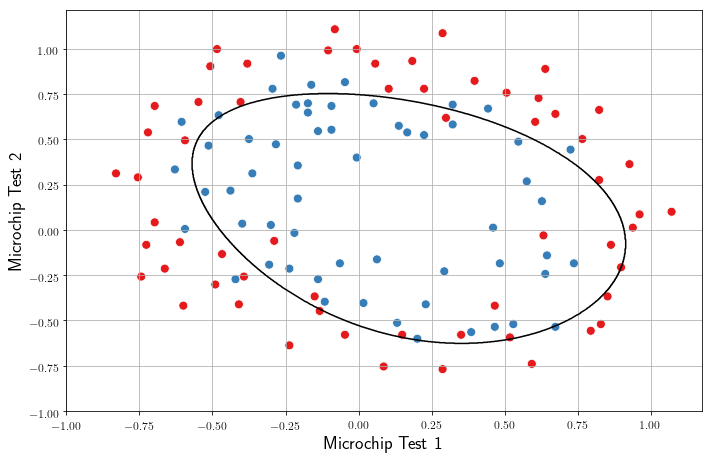

In [25]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax = sns.scatterplot(data = data, x = "microchip_test_1", y = "microchip_test_2", hue = "pass", palette = "Set1", s = 80, legend = False)
ax.contour(uu, vv, z, levels = 0, colors = "k")
ax.set_xlabel("Microchip Test 1", fontsize = 18)
ax.set_ylabel("Microchip Test 2", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = False))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [26]:
model = sbbml.RidgeClassifier(alpha = 0.01, gamma = 1.0, normalize = True)
x_train_poly = utils.map_polynomial_features(x = x_train, degree = 3)
model.fit(x_train_poly, y_train)

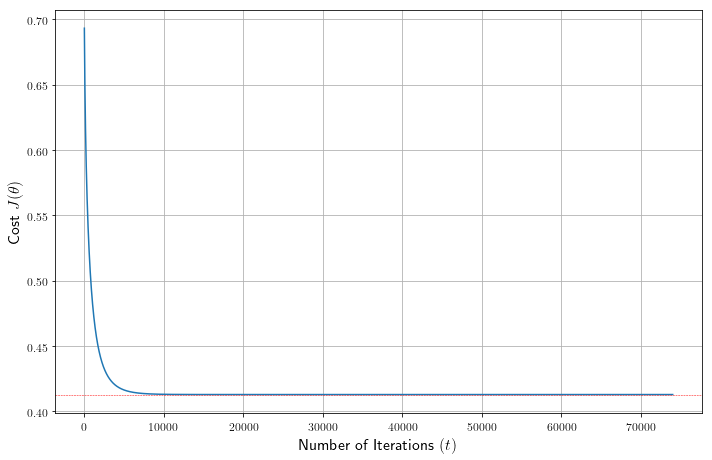

In [27]:
utils.plot_cost_function(cost = model.cost[0], width = 10.0, height = 6.5)

In [28]:
x_test_poly = utils.map_polynomial_features(x = x_test, degree = 3)
y_prime = model.predict(x_test_poly)
np.mean(y_test.flatten() == y_prime.flatten())

0.75

In [29]:
mat = sio.loadmat("data/ex3data.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [30]:
x = mat["X"]
y = mat["y"]

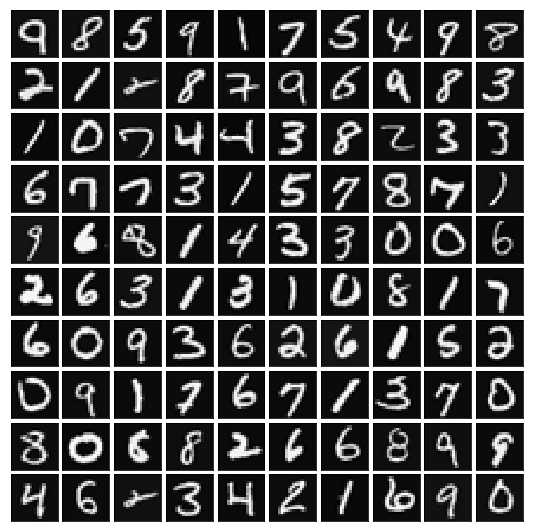

In [31]:
nrows = 10
ncols = 10

fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (7.5, 7.5))

for i in range(nrows):
    for j in range(ncols):
        k   = np.random.randint(0, 5000)
        img = np.transpose(x[k].reshape(20, 20))
        ax[i,j].imshow(img, cmap = "gray")
        ax[i,j].margins(0.0)

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

In [32]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80)

In [33]:
model = sbbml.LogisticClassifier(alpha = 0.01, normalize = False)
model.fit(x_train, y_train)
y_prime = model.predict(x_test)
np.mean(y_test.flatten() == y_prime.flatten())

0.914

In [34]:
model = sbbml.RidgeClassifier(alpha = 0.01, gamma = 10.0, normalize = False)
model.fit(x_train, y_train)
y_prime = model.predict(x_test)
np.mean(y_test.flatten() == y_prime.flatten())

0.913